### Импортируем библиотеки

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


### Наш датасет

In [62]:
breast_cancer = load_breast_cancer()

In [63]:
breast_cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

### Выводим кол-во признаков

In [64]:
breast_cancer.data[0].shape

(30,)

### Сокращаем  кол-во признаков до 2. Таким образом мы уменьшим размерность задачи.

Так же, делим модель на обучающую и тестовую выборку

In [65]:
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y,
                                                    train_size=0.80,
                                                    random_state=42,
                                                    stratify=y)

### Выводим датасет, в котором мы сократили кол-во признаков до 2

In [66]:
X_2d

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

### Обучаем модель

In [67]:
clf = SVC(C=0.01)

clf.fit(X_train, y_train)

SVC(C=0.01)

### Метрика точности для тестовых и обучающих выборок

In [68]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.6989010989010989
0.7280701754385965


### Делаем предсказание результата класса на основе тестовой выборки

In [77]:
y_pred = clf.predict(X_test)


class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)


sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

#plt.plot(range(10))
# fig.savefig('temp.png', dpi=fig.dpi)
# plt.close(fig)

### Строим графическую зависимость тестовой и обучающей точности от размера обучающей выборки.

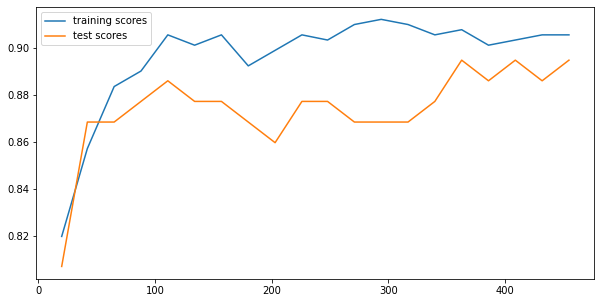

In [70]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 20):

    clf = SVC(C=15, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)

    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best");

Повторите предыдущий пункт для различных значений C в
диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по
вертикальной оси. Для каких значений тестовая точность
оптимальна? Какие значения дают недообучение? Какие -
переобучение?

In [71]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y,
                                                    train_size=0.80,
                                                    random_state=42,
                                                    stratify=y)

In [78]:
import os

dir = os.path.join("Result_Sets")
if not os.path.exists(dir):
    os.mkdir(dir)

In [ ]:
%matplotlib inline
i=0.0001
while i<=1000000.0:
  clf = SVC(C=i)
  print(clf)
  clf.fit(X_train, y_train)
  print(clf.score(X_train, y_train))
  print(clf.score(X_test, y_test))

  y_pred = clf.predict(X_test)

  class_names = [0, 1]
  fig, ax = plt.subplots()
  ticks = np.arange(len(class_names))
  plt.xticks(ticks, class_names)
  plt.yticks(ticks, class_names)

  sns.heatmap(pd.DataFrame(
      metrics.confusion_matrix(y_test, y_pred)),
      annot=True)
  plt.ylabel('Действительные значения')
  plt.xlabel('Предсказанные значения')

  fig.savefig(f"/content/Result_Sets/Set_{i}.png", dpi=fig.dpi)
  plt.close(fig)
  
  print("\n\n\n")
  i+=0.0001

Выходные данные были обрезаны до нескольких последних строк (5000).
0.9120879120879121
0.8947368421052632




SVC(C=0.23919999999998998)
0.9120879120879121
0.8947368421052632




SVC(C=0.23929999999998997)
0.9120879120879121
0.8947368421052632




SVC(C=0.23939999999998995)
0.9120879120879121
0.8947368421052632




SVC(C=0.23949999999998994)
0.9120879120879121
0.8947368421052632




SVC(C=0.23959999999998993)
0.9120879120879121
0.8947368421052632




SVC(C=0.23969999999998992)
0.9120879120879121
0.8947368421052632




SVC(C=0.2397999999999899)
0.9120879120879121
0.8947368421052632




SVC(C=0.2398999999999899)
0.9120879120879121
0.8947368421052632




SVC(C=0.2399999999999899)
0.9120879120879121
0.8947368421052632




SVC(C=0.24009999999998988)
0.9120879120879121
0.8947368421052632




SVC(C=0.24019999999998987)
0.9120879120879121
0.8947368421052632




SVC(C=0.24029999999998986)
0.9120879120879121
0.8947368421052632




SVC(C=0.24039999999998984)
0.9120879120879121
0.8947368421052632
